<a href="https://colab.research.google.com/github/yeonghun00/stock_public/blob/main/macroecon_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests 
import pandas as pd
import json
import datetime

In [2]:
# http://ecos.bok.or.kr/jsp/openapi/OpenApiController.jsp?t=guideStatCd&menuGroup=MENU000004&menuCode=MENU000024
api = 'NTD28IR6I6JDKW29OVKJ'

In [3]:
def get_data(code, unit, start_date, end_date, code2):
  url = 'http://ecos.bok.or.kr/api/StatisticSearch/' + api + '/json/kr/1/5000/' + f'{code}/{unit}/{start_date}/{end_date}/{code2}'
  response = requests.get(url)
  if response.status_code == 200:
      try:
          contents = response.text
      except Exception as e:
          print(str(e))
  df = pd.DataFrame(json.loads(contents)['StatisticSearch']['row'])
  df['DATA_VALUE'] = [float(x) for x in df['DATA_VALUE']]
  if unit == 'YY':
    df['TIME'] = [datetime.datetime.strptime(x, '%Y') for x in df['TIME']]
  else:
    df['TIME'] = [datetime.datetime.strptime(x, '%Y%m') for x in df['TIME']]
  return df

In [4]:
m_value = get_data('001Y406', 'YY', '201001', '202001', 'BBGS00')
debt = get_data('008Y001', 'YY', '201001' , '202001', '11000A0')

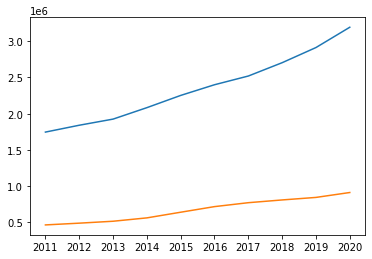

In [5]:
import matplotlib.pyplot as plt

plt.plot(m_value['TIME'], m_value['DATA_VALUE'])
plt.plot(debt['TIME'], debt['DATA_VALUE'])

plt.show()